In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDASIteration4').getOrCreate()

In [2]:
df_listings = spark.read.load("./listings.csv",format="csv",inferSchema=True, header="true")
#df_listings.show()
df_listings.count()

22895

In [3]:
df_listings.columns

['id',
 'host_since',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'first_review',
 'instant_bookable',
 'cancellation_policy']

In [4]:
df_listings.printSchema()

root
 |-- id: integer (nullable = true)
 |-- host_since: timestamp (nullable = true)
 |-- accommodates: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- beds: integer (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- first_review: timestamp (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)



In [5]:
df_summary = spark.read.load("./listings_summary.csv",format="csv",inferSchema=True, header="true")
#df_summary.show()
df_summary.count()

22895

In [6]:
df_summary.columns

['id',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'collect_date']

In [7]:
df_summary.printSchema()

root
 |-- id: integer (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- collect_date: timestamp (nullable = true)



In [8]:
#count of missing values
from pyspark.sql.functions import when, count, col

df_listings.select([count(when(col(c).isNull(), c)).alias(c) for c in df_listings.columns]).show()
df_summary.select([count(when(col(c).isNull(), c)).alias(c) for c in df_summary.columns]).show()

+---+----------+------------+---------+--------+----+--------+------------+----------------+-------------------+
| id|host_since|accommodates|bathrooms|bedrooms|beds|bed_type|first_review|instant_bookable|cancellation_policy|
+---+----------+------------+---------+--------+----+--------+------------+----------------+-------------------+
|  0|         3|           0|       17|       5|  34|       0|        5242|               0|                  0|
+---+----------+------------+---------+--------+----+--------+------------+----------------+-------------------+

+---+-------+---------+-------------+--------+---------+---------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+------------+
| id|host_id|host_name|neighbourhood|latitude|longitude|room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|collect_date|
+---+-------+---------+-------------+---

In [9]:
#join two data frames
df_merged= df_summary.join(df_listings, "id", "outer")

#check if joined correctly 
df_merged[df_merged["id"]==30593623].show()
df_merged.count()


+--------+--------+---------+-------------+------------+-----------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+--------------------+--------------------+------------+---------+--------+----+--------+------------+----------------+-------------------+
|      id| host_id|host_name|neighbourhood|    latitude|  longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|        collect_date|          host_since|accommodates|bathrooms|bedrooms|beds|bed_type|first_review|instant_bookable|cancellation_policy|
+--------+--------+---------+-------------+------------+-----------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+--------------------+--------------------+------------+---------+--------+----+--------+------------+----------------+-

22895

In [21]:
!pip3 install seaborn
!pip3 install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 216 kB 18.8 MB/s eta 0:00:01
  Using cached scipy-1.4.1-cp35-cp35m-manylinux1_x86_64.whl (26.0 MB)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (20.1.1)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'Heatmap between Features')

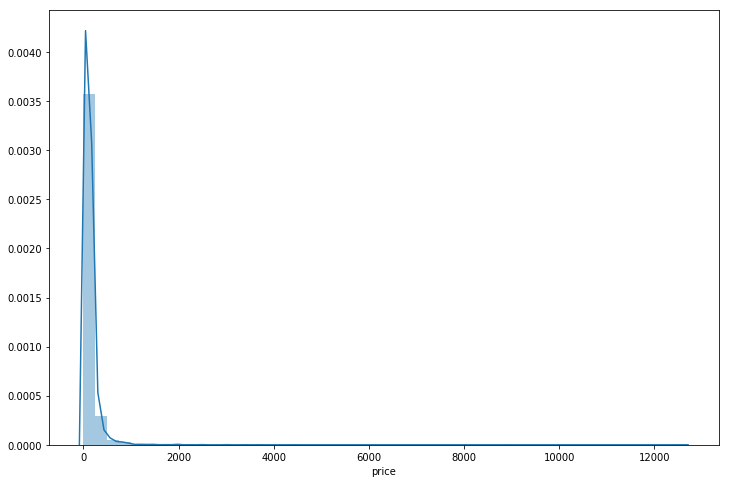

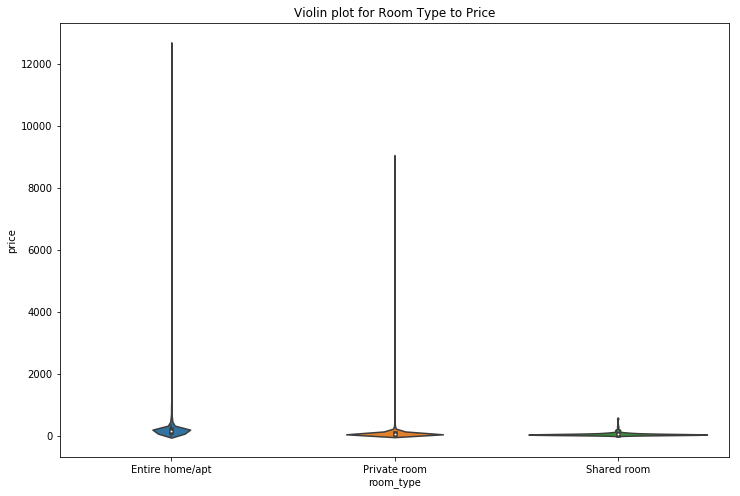

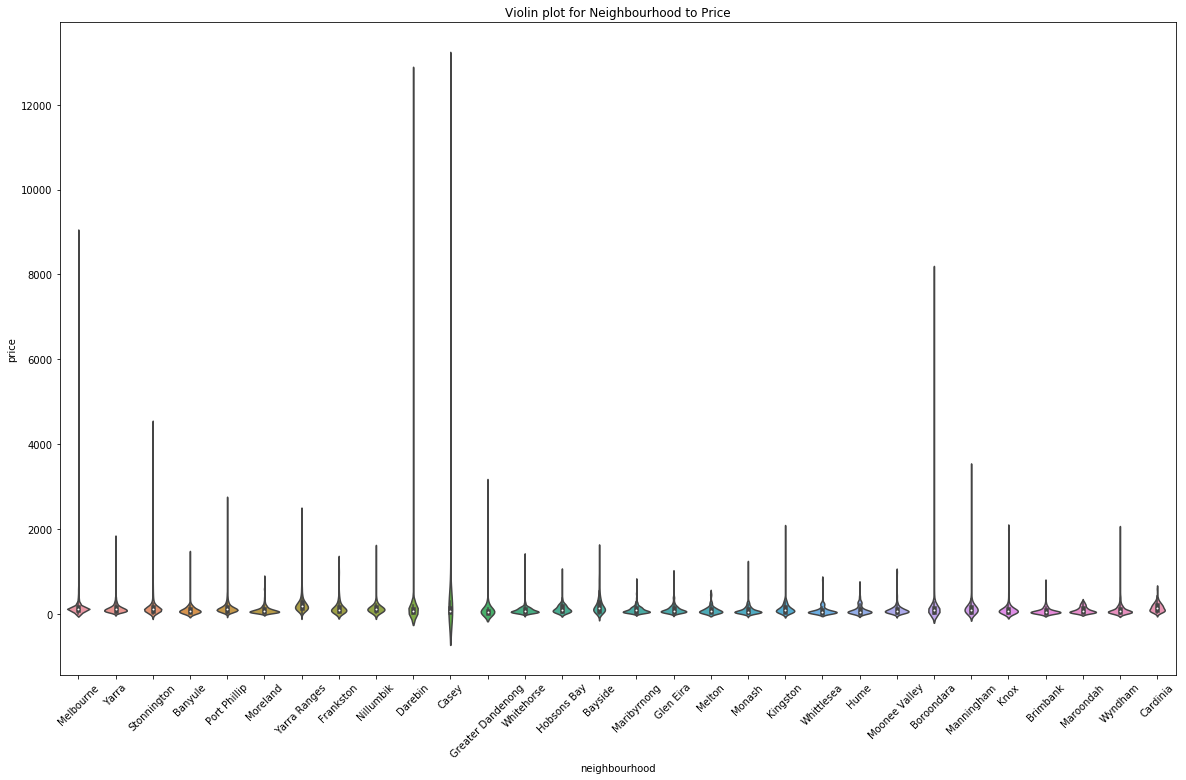

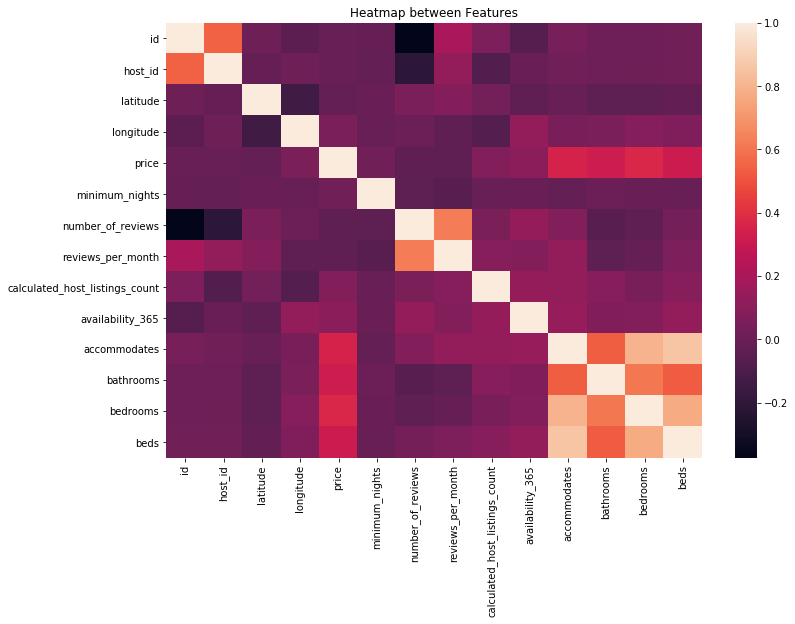

In [11]:
## Visualize the dataset
display_df = df_merged.toPandas()
# display distribution of price
plt.figure(figsize=(12,8))
sns.distplot(display_df['price'])

# check price according to room type
plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
sns.violinplot(display_df['room_type'], display_df['price'])
plt.title("Violin plot for Room Type to Price")

# check price according to neighbourhood
plt.figure(figsize=(20,12), facecolor='w', edgecolor='k')
sns.violinplot(display_df['neighbourhood'], display_df['price'])
plt.title("Violin plot for Neighbourhood to Price")
plt.xticks(rotation=45)

# check correlations between features 
plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
sns.heatmap(display_df.corr())
plt.title("Heatmap between Features")

In [12]:
#Drop rows with missing values 
df=df_merged.na.drop()
df.count()

17633

In [13]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- collect_date: timestamp (nullable = true)
 |-- host_since: timestamp (nullable = true)
 |-- accommodates: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- beds: integer (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- first_review: timestamp (nullable = true)
 |-- instant_bookable: string 

In [14]:
# describing outliers with columns
df_show= df.select(['price','bathrooms','bathrooms'])
df_show.describe().show()

+-------+------------------+------------------+------------------+
|summary|             price|         bathrooms|         bathrooms|
+-------+------------------+------------------+------------------+
|  count|             17633|             17633|             17633|
|   mean|141.17898258946295|1.2821981511937843|1.2821981511937843|
| stddev|190.16815994503992|0.5619404859778877|0.5619404859778877|
|    min|                 0|               0.0|               0.0|
|    max|             12624|              14.0|              14.0|
+-------+------------------+------------------+------------------+



In [15]:
# Remove outliers of dependent variable 
cols=['price']
df_outliers=df.select(cols)

for col in cols:
    quantiles=df_outliers.approxQuantile(col,[0.25,0.75],0.05) 
    IQR=quantiles[1]-quantiles[0]
    

df_RmOutliers=df.filter(df['price'] < quantiles[1]+1.5*IQR)
#df_RmOutliers[df_RmOutliers["id"]==9835].show()
df_RmOutliers.count()


16207

In [16]:
# remove non-buisiness features from dataframe 
businessFeatureCols=['id','neighbourhood','room_type','price','minimum_nights','number_of_reviews','last_review',
                     'reviews_per_month','availability_365','host_since','accommodates','bathrooms',
                     'bedrooms','beds','bed_type','first_review','instant_bookable','cancellation_policy','collect_date']
df_businessFeatures=df_RmOutliers.select(businessFeatureCols)


In [17]:
#construct 'stay in business feature'
from pyspark.sql.functions import datediff,col,format_number

df_StayInBusiness=df_businessFeatures.withColumn("Stay_in_Business", datediff(col("collect_date"),col("host_since"))/365.25)
#format number to two decimal places
df_formatted = df_StayInBusiness.select(['id','neighbourhood','room_type','price','minimum_nights',
                                         'number_of_reviews','last_review','reviews_per_month','availability_365',
                                         'host_since','accommodates','bathrooms',
                                         'bedrooms','beds','bed_type','first_review','instant_bookable','cancellation_policy',
                                         format_number("Stay_in_Business",2)])
# Rename Column Name 
df_renamed = df_formatted.withColumnRenamed("format_number(Stay_in_Business, 2)","Stay In Business")

# Demonstrate of constructed feature
df_renamed.select('id','neighbourhood','room_type','price','minimum_nights','Stay In Business').show(1)

+----+-------------+------------+-----+--------------+----------------+
|  id|neighbourhood|   room_type|price|minimum_nights|Stay In Business|
+----+-------------+------------+-----+--------------+----------------+
|9835|   Manningham|Private room|   60|             1|            9.30|
+----+-------------+------------+-----+--------------+----------------+
only showing top 1 row



In [18]:
df_renamed.printSchema()

root
 |-- id: integer (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- host_since: timestamp (nullable = true)
 |-- accommodates: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- beds: integer (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- first_review: timestamp (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- Stay In Business: string (nullable = true)



In [19]:
#convert varibale from string to integer 
from pyspark.sql.types import IntegerType
df_renamed = df_renamed.withColumn("Stay In Business_years", df_renamed["Stay In Business"].cast(IntegerType()))

In [20]:
# Correlation matrix - check correlations between features 
df_features = df_renamed.toPandas()
featureCorr = df_features.corr()
featureCorr

,id,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,accommodates,bathrooms,bedrooms,beds,Stay In Business_years
id,1.000000,-0.055042,-0.018816,-0.388999,0.192281,-0.120507,0.069808,0.028343,0.037553,0.046316,-0.528620
price,-0.055042,1.000000,-0.011247,0.089542,0.097703,0.144177,0.596053,0.266559,0.525893,0.476700,0.046390
minimum_nights,-0.018816,-0.011247,1.000000,-0.031934,-0.051977,-0.003170,-0.017932,0.006903,-0.006162,-0.010890,0.017568
number_of_reviews,-0.388999,0.089542,-0.031934,1.000000,0.623014,0.165189,0.098774,-0.051415,-0.029574,0.045562,0.201117
reviews_per_month,0.192281,0.097703,-0.051977,0.623014,1.000000,0.102070,0.188192,-0.012132,0.027197,0.105386,-0.120905
availability_365,-0.120507,0.144177,-0.003170,0.165189,0.102070,1.000000,0.109295,0.035680,0.033783,0.109831,0.063677
accommodates,0.069808,0.596053,-0.017932,0.098774,0.188192,0.109295,1.000000,0.406446,0.764474,0.845647,-0.051765
bathrooms,0.028343,0.266559,0.006903,-0.051415,-0.012132,0.035680,0.406446,1.000000,0.471702,0.401863,-0.033683
bedrooms,0.037553,0.525893,-0.006162,-0.029574,0.027197,0.033783,0.764474,0.471702,1.000000,0.718630,-0.034624
beds,0.046316,0.476700,-0.010890,0.045562,0.105386,0.109831,0.845647,0.401863,0.718630,1.000000,-0.055461


In [21]:
#Correlation with output variable
cor_target = abs(featureCorr["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print("\n Relevant Features: \n",relevant_features)


 Relevant Features: 
 price               1.000000
availability_365    0.144177
accommodates        0.596053
bathrooms           0.266559
bedrooms            0.525893
beds                0.476700
Name: price, dtype: float64


In [100]:
# # alternative to above method for feature selection
# cor1=df_renamed.stat.corr("bathrooms","price")
# cor2=df_renamed.stat.corr("accommodates","price")
# cor3=df_renamed.stat.corr("availability_365","price")
# cor4=df_renamed.stat.corr("reviews_per_month","price")
# cor5=df_renamed.stat.corr("number_of_reviews","price")
# cor6=df_renamed.stat.corr("minimum_nights","price")

# print("bathrooms:{}".format(str(cor1)))
# print("accommodates:{}".format(str(cor2)))
# print("availability_365:{}".format(str(cor3)))
# print("reviews_per_month:{}".format(str(cor4)))
# print("number_of_reviews:{}".format(str(cor5)))
# print("minimum_nights:{}".format(str(cor6)))

bathrooms:0.26655876244795573
accommodates:0.5960532565995753
availability_365:0.1441766753502625
reviews_per_month:0.09770331258171845
number_of_reviews:0.0895415841068332
minimum_nights:-0.011247102354399142


In [22]:
# # data form with selected important variables
# df_final = df_renamed.select(['price','availability_365','accommodates',
#                               'bathrooms','bedrooms','beds','neighbourhood','room_type'])

# Adding more variables -  'number_of_reviews'
df_final = df_renamed.select(['price','number_of_reviews','availability_365','accommodates',
                              'bathrooms','bedrooms','beds','neighbourhood','room_type'])

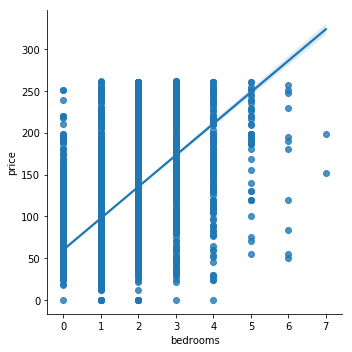

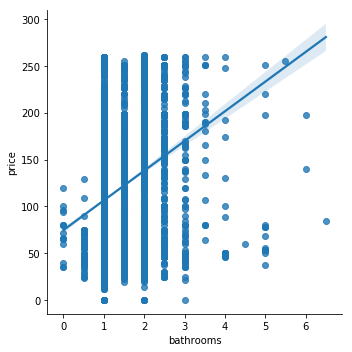

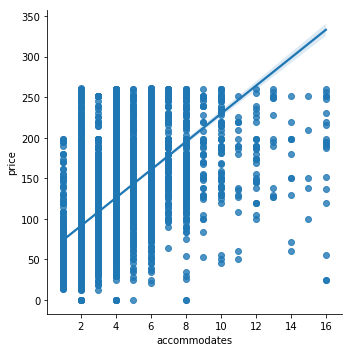

In [23]:
###Visualization 
display_df_final = df_final.toPandas()
sns.lmplot(y = 'price', x = 'bedrooms', data=display_df_final)
sns.lmplot(y = 'price', x = 'bathrooms', data=display_df_final)
sns.lmplot(y = 'price', x = 'accommodates', data=display_df_final)

In [24]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [25]:
# create catogory/string indexer 
neighbourhood_indexer = StringIndexer(inputCol='neighbourhood',outputCol='neighbourhoodIndex').fit(df_final)
df_final = neighbourhood_indexer.transform(df_final)

# one hot encode these numbers, to convert the various outputs into a single vector.
df_final = OneHotEncoder(inputCol='neighbourhoodIndex',outputCol='neighbourhoodVec').transform(df_final)

In [26]:
#convert the rest catogorical predictors 
room_type_indexer = StringIndexer(inputCol='room_type',outputCol='room_typeIndex').fit(df_final)
df_final = room_type_indexer.transform(df_final)

df_final = OneHotEncoder(inputCol='room_typeIndex',outputCol='room_typeVec').transform(df_final)

In [27]:
# # assemble all of this as one vector in the features column. 
# assembler = VectorAssembler(inputCols=[
#     'availability_365',
#     'accommodates',
#     'bathrooms',
#     'bedrooms',
#     'beds',    
#     'room_typeVec',
#     'neighbourhoodVec'],
#                             outputCol='features')

### With more variables 
# assemble all of this as one vector in the features column. 
assembler = VectorAssembler(inputCols=[
    'number_of_reviews',
    'availability_365',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',    
    'room_typeVec',
    'neighbourhoodVec'],
                            outputCol='features')

In [28]:
# transform the data
output = assembler.transform(df_final)

In [29]:
final_data = output.select("features","price")
final_data.show(5)

+--------------------+-----+
|            features|price|
+--------------------+-----+
|(37,[0,1,2,3,4,5,...|   60|
|(37,[0,1,2,3,4,5,...|   35|
|(37,[0,1,2,3,4,5,...|  159|
|(37,[0,2,3,4,5,7,...|   50|
|(37,[0,1,2,3,4,5,...|   69|
+--------------------+-----+
only showing top 5 rows



In [30]:
# 70/30 split. 
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [31]:
# Linear Regression Model 
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='price')

In [32]:
# Fit the model to the data.
lrModel = lr.fit(train_data)

In [33]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-0.047320882158313524,0.052915211426082055,4.8158531201249435,8.149113973136625,17.960035334487465,-1.495434977807523,70.82404145751114,22.236145641743388,29.919228582938228,25.032086179473676,28.457160648627525,24.12492172905151,9.935453411778072,5.833508057498451,50.20291815414556,5.1872132949884096,10.36638288207848,9.556333433051531,3.852972168786396,2.431020783117685,-5.036322559780642,10.547080364645925,16.410339904776787,19.336720699096638,6.717347135741295,16.57276030815616,-0.7317021768408932,11.136599981513083,1.434944514644054,-1.1137379083841523,-3.367409945236257,-2.1565621775348855,3.645253259855958,31.668428834479496,-9.699153538040191,-6.445430956710116,25.215799204483158] Intercept: -15.295181201062698


In [34]:
#list the featrues, so that can match with Coefficients
numeric_metadata = final_data.select("features").schema[0].metadata.get('ml_attr').get('attrs').get('numeric')
binary_metadata = final_data.select("features").schema[0].metadata.get('ml_attr').get('attrs').get('binary')
merge_list = numeric_metadata + binary_metadata 
merge_list 

[{'idx': 0, 'name': 'number_of_reviews'},
 {'idx': 1, 'name': 'availability_365'},
 {'idx': 2, 'name': 'accommodates'},
 {'idx': 3, 'name': 'bathrooms'},
 {'idx': 4, 'name': 'bedrooms'},
 {'idx': 5, 'name': 'beds'},
 {'idx': 6, 'name': 'room_typeVec_Entire home/apt'},
 {'idx': 7, 'name': 'room_typeVec_Private room'},
 {'idx': 8, 'name': 'neighbourhoodVec_Melbourne'},
 {'idx': 9, 'name': 'neighbourhoodVec_Port Phillip'},
 {'idx': 10, 'name': 'neighbourhoodVec_Yarra'},
 {'idx': 11, 'name': 'neighbourhoodVec_Stonnington'},
 {'idx': 12, 'name': 'neighbourhoodVec_Moreland'},
 {'idx': 13, 'name': 'neighbourhoodVec_Darebin'},
 {'idx': 14, 'name': 'neighbourhoodVec_Yarra Ranges'},
 {'idx': 15, 'name': 'neighbourhoodVec_Whitehorse'},
 {'idx': 16, 'name': 'neighbourhoodVec_Boroondara'},
 {'idx': 17, 'name': 'neighbourhoodVec_Glen Eira'},
 {'idx': 18, 'name': 'neighbourhoodVec_Monash'},
 {'idx': 19, 'name': 'neighbourhoodVec_Maribyrnong'},
 {'idx': 20, 'name': 'neighbourhoodVec_Wyndham'},
 {'idx'

In [35]:
# Evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

# Print evaluation metrics RMSE and R2
print("Linear Regression Model - Root Mean Squared Error (RMSE)= {}".format(test_results.rootMeanSquaredError))
print("Linear Regression Model - R2: {}".format(test_results.r2))

Linear Regression Model - Root Mean Squared Error (RMSE)= 34.82941156054797
Linear Regression Model - R2: 0.5930282525285386


In [36]:
# Residuals - show the difference between the predicted value and the test data
test_results.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| 41.429630458690426|
|-22.828763378105236|
| -100.0440180430623|
|-22.467844848090124|
| 105.14490461466673|
|  -9.30949918376551|
|-39.050354731639516|
|-34.262015577343846|
|  80.23341940046367|
| -25.73282087517417|
|  79.52632357695182|
| -22.87291263914517|
| 22.972162228105205|
|  39.69131496976293|
| -22.59866233296428|
|  4.479654124058598|
| 17.015053767378674|
| -24.86323839009468|
|  24.13676160990532|
| 39.891341039838835|
+-------------------+
only showing top 20 rows



In [37]:
# Training data.
train_data.describe().show()
# Testing data.
test_data.describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|             11299|
|   mean|112.62704664129569|
| stddev| 54.73434481116126|
|    min|                 0|
|    max|               260|
+-------+------------------+

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              4908|
|   mean|114.36226568867156|
| stddev| 54.60196279498496|
|    min|                 0|
|    max|               262|
+-------+------------------+



In [38]:
# compare Actual price and Prediction 
lr_predictions = lrModel.transform(test_data)
lr_predictions.select("prediction","price","features").show()

+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
|108.57036954130957|  150|(37,[0,1,2,3,4,5,...|
|147.82876337810524|  125|(37,[0,1,2,3,4,5,...|
| 164.0440180430623|   64|(37,[0,1,2,3,4,5,...|
|152.46784484809012|  130|(37,[0,1,2,3,4,5,...|
|145.85509538533327|  251|(37,[0,1,2,3,4,5,...|
|118.30949918376551|  109|(37,[0,1,2,3,4,5,...|
|154.05035473163952|  115|(37,[0,1,2,3,4,5,...|
|154.26201557734385|  120|(37,[0,1,2,3,4,5,...|
|152.76658059953633|  233|(37,[0,1,2,3,4,5,...|
|118.73282087517417|   93|(37,[0,1,2,3,4,5,...|
|154.47367642304818|  234|(37,[0,1,2,3,4,5,...|
|147.87291263914517|  125|(37,[0,1,2,3,4,5,...|
| 127.0278377718948|  150|(37,[0,1,2,3,4,5,...|
|125.30868503023707|  165|(37,[0,1,2,3,4,5,...|
|120.59866233296428|   98|(37,[0,1,2,3,4,5,...|
| 125.5203458759414|  130|(37,[0,1,2,3,4,5,...|
|141.98494623262133|  159|(37,[0,1,2,3,4,5,...|
|120.86323839009468|   96|(37,[0,1,2,3,4

In [39]:
# Decision Tree Regression
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'price')
dt_model = dt.fit(train_data)

In [40]:
from pyspark.ml.evaluation import RegressionEvaluator
dt_predictions = dt_model.transform(test_data)
rmse_dt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = rmse_dt_evaluator.evaluate(dt_predictions)
print("Decision Tree Regression - Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Decision Tree Regression - Root Mean Squared Error (RMSE) on test data = 35.2598


In [41]:
r2_dt_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="r2")
print("Decision Tree Regression - R Squared (R2) = %g" % r2_dt_evaluator.evaluate(dt_predictions))

Decision Tree Regression - R Squared (R2) = 0.582907


In [42]:
#Gradient-boosted tree regression
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'price', maxIter=10)
gbt_model = gbt.fit(train_data)

In [43]:
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'price', 'features').show(5)

+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
|126.15818973222312|  150|(37,[0,1,2,3,4,5,...|
|168.26863022983616|  125|(37,[0,1,2,3,4,5,...|
| 147.6795000368541|   64|(37,[0,1,2,3,4,5,...|
| 147.6795000368541|  130|(37,[0,1,2,3,4,5,...|
|162.85364232181698|  251|(37,[0,1,2,3,4,5,...|
+------------------+-----+--------------------+
only showing top 5 rows



In [44]:
## Compute RMSE
rmse_gbt_evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = rmse_gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 34.3692


In [45]:
## Compute R2
r2_gbt_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="price",metricName="r2")
print("R Squared (R2) on test data = %g" % r2_gbt_evaluator.evaluate(gbt_predictions))

R Squared (R2) on test data = 0.603712
